In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time
from IPython.core.display import display, HTML

sns.set_theme()

## Load dataset

In [2]:
df = pd.read_csv("datasets/boston-marathon/results2017.csv")

## Exploration data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26411 entries, 0 to 26410
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   place_overall       26410 non-null  float64
 1   bib                 26410 non-null  object 
 2   name                26410 non-null  object 
 3   age                 26410 non-null  float64
 4   gender              26410 non-null  object 
 5   city                26410 non-null  object 
 6   state               22815 non-null  object 
 7   country_residence   26410 non-null  object 
 8   contry_citizenship  1254 non-null   object 
 9   name_suffix         91 non-null     object 
 10  5k                  26410 non-null  object 
 11  10k                 26410 non-null  object 
 12  15k                 26410 non-null  object 
 13  20k                 26410 non-null  object 
 14  half                26410 non-null  object 
 15  25k                 26410 non-null  object 
 16  30k 

In [4]:
df.describe()

,place_overall,age,overall,gender_result,division_result,seconds
count,26410.000000,26410.000000,26410.000000,26410.000000,26410.000000,26411.000000
mean,13204.500000,42.587732,13206.260091,6660.973230,1588.796706,14283.309000
std,7624.054641,11.419467,7624.370496,3910.031525,1423.199500,2529.152218
min,0.000000,18.000000,1.000000,1.000000,1.000000,7777.000000
25%,6602.250000,34.000000,6604.250000,3302.250000,502.000000,12499.000000
50%,13204.500000,43.000000,13206.500000,6603.500000,1154.000000,13899.000000
75%,19806.750000,51.000000,19808.750000,9904.750000,2190.750000,15708.000000
max,26409.000000,84.000000,26411.000000,14438.000000,5846.000000,28694.000000


In [5]:
# there are a lot of countries in this dataset (109 - 92) which will cause a significant impact to the dataset
# country_code and country have different unique values
df.describe(include="O").T

,count,unique,top,freq
bib,26410,26410,713,1
name,26410,26365,"Brennan, Jennifer",2
gender,26410,2,M,14438
city,26410,5926,Boston,702
state,22815,68,MA,4586
country_residence,26410,91,USA,20945
contry_citizenship,1254,85,GBR,141
name_suffix,91,2,VI,54
5k,26410,1327,0:24:38,69
10k,26410,2475,-,54


In [6]:
df.head(5)

,place_overall,bib,name,age,gender,city,state,country_residence,contry_citizenship,name_suffix,...,pace,projected_time,official_time,overall,gender_result,division_result,seconds,first_name,last_name,display_name
0,0.0,11,"Kirui, Geoffrey",24.0,M,Keringet,NaN,KEN,NaN,NaN,...,0:04:57,-,2:09:37,1.0,1.0,1.0,7777,Geoffrey,Kirui,Geoffrey Kirui
1,1.0,17,"Rupp, Galen",30.0,M,Portland,OR,USA,NaN,NaN,...,0:04:58,-,2:09:58,2.0,2.0,2.0,7798,Galen,Rupp,Galen Rupp
2,2.0,23,"Osako, Suguru",25.0,M,Machida-City,NaN,JPN,NaN,NaN,...,0:04:59,-,2:10:28,3.0,3.0,3.0,7828,Suguru,Osako,Suguru Osako
3,3.0,21,"Biwott, Shadrack",32.0,M,Mammoth Lakes,CA,USA,NaN,NaN,...,0:05:03,-,2:12:08,4.0,4.0,4.0,7928,Shadrack,Biwott,Shadrack Biwott
4,4.0,9,"Chebet, Wilson",31.0,M,Marakwet,NaN,KEN,NaN,NaN,...,0:05:04,-,2:12:35,5.0,5.0,5.0,7955,Wilson,Chebet,Wilson Chebet


In [7]:
countries = df["country_residence"].unique()
countries

array(['KEN', 'USA', 'JPN', 'ETH', 'ZIM', 'MEX', 'BRN', 'BRA', 'CAN',
       'ITA', 'NED', 'IRL', 'BDI', 'GBR', 'GER', 'ESP', 'SUI', 'COL',
       'NOR', 'POL', 'FRA', 'RUS', 'POR', 'CRC', 'BEL', 'NZL', 'PER',
       'DOM', 'PAN', 'AUS', 'DEN', 'MAS', 'PHI', 'CHI', 'AUT', 'ARG',
       'SIN', 'CHN', 'TWN', 'GUA', 'RSA', 'HKG', 'SLO', 'EST', 'TUR',
       'EGY', 'IND', 'UAE', 'SWE', 'BER', 'KOR', 'CAY', 'FIN', 'LTU',
       'GRE', 'CRO', 'ISL', 'LUX', 'FLK', 'VEN', 'JAM', 'THA', 'HON',
       'SRB', 'CZE', 'ISR', 'MLT', 'HUN', 'ECU', 'KSA', 'ESA', 'MAR',
       'ROU', 'LAT', 'UKR', 'SMR', 'BUL', 'ALG', 'NCA', 'SVK', 'AND',
       'BAR', 'INA', 'GRN', 'URU', 'PAR', 'TCA', 'KUW', 'TRI', 'MGL',
       'NGR', nan], dtype=object)

### Check null

In [8]:
# the dataset doesn't miss any information
df.isnull().sum()

place_overall             1
bib                       1
name                      1
age                       1
gender                    1
city                      1
state                  3596
country_residence         1
contry_citizenship    25157
name_suffix           26320
5k                        1
10k                       1
15k                       1
20k                       1
half                      1
25k                       1
30k                       1
35k                       1
40k                       1
pace                      1
projected_time            1
official_time             1
overall                   1
gender_result             1
division_result           1
seconds                   0
first_name                1
last_name                 1
display_name              1
dtype: int64

I think state, contry_citizenship, bib, and name_suffix won't contribute significantly to the model, so I will drop the columns. Subsequently, I will dorp the missing rows.

In [9]:
df = df.drop(["state", "contry_citizenship", "name_suffix", "bib"], axis=1)
df = df.dropna()

### Univariate analysis

Univariate involves the analysis of a single variable.

In [10]:
alpha3 = {"ABW":"ARU","AFG":"AFG","AGO":"ANG","AIA":"AIA","ALA":" ","ALB":"ALB","AND":"AND","ARE":"UAE","ARG":"ARG","ARM":"ARM","ASM":"ASA","ATA":" ","ATF":" ","ATG":"ANT","AUS":"AUS","AUT":"AUT","AZE":"AZE","BDI":"BDI","BEL":"BEL","BEN":"BEN","BES":"AHO","BFA":"BUR","BGD":"BAN","BGR":"BUL","BHR":"BRN","BHS":"BAH","BIH":"BIH","BLM":" ","BLR":"BLR","BLZ":"BIZ","BMU":"BER","BOL":"BOL","BRA":"BRA","BRB":"BAR","BRN":"BRU","BTN":"BHU","BVT":" ","BWA":"BOT","CAF":"CAF","CAN":"CAN","CCK":" ","CHE":"SUI","CHL":"CHI","CHN":"CHN","CIV":"CIV","CMR":"CMR","COD":"COD","COG":"CGO","COK":"COK","COL":"COL","COM":"COM","CPV":"CPV","CRI":"CRC","CUB":"CUB","CUW":"","CXR":" ","CYM":"CAY","CYP":"CYP","CZE":"CZE","DEU":"GER","DJI":"DJI","DMA":"DMA","DNK":"DEN","DOM":"DOM","DZA":"ALG","ECU":"ECU","EGY":"EGY","ERI":"ERI","ESH":" ","ESP":"ESP","EST":"EST","ETH":"ETH","FIN":"FIN","FJI":"FIJ","FLK":"FLK","FRA":"FRA","FRO":"FAR","FSM":"FSM","GAB":"GAB","GBR":"GBR","GEO":"GEO","GGY":" ","GHA":"GHA","GIB":"GIB","GIN":"GUI","GLP":"GUD","GMB":"GAM","GNB":"GBS","GNQ":"GEQ","GRC":"GRE","GRD":"GRN","GRL":"GRL","GTM":"GUA","GUF":"FGU","GUM":"GUM","GUY":"GUY","HKG":"HKG","HMD":" ","HND":"HON","HRV":"CRO","HTI":"HAI","HUN":"HUN","IDN":"INA","IMN":" ","IND":"IND","IOT":" ","IRL":"IRL","IRN":"IRI","IRQ":"IRQ","ISL":"ISL","ISR":"ISR","ITA":"ITA","JAM":"JAM","JEY":" ","JOR":"JOR","JPN":"JPN","KAZ":"KAZ","KEN":"KEN","KGZ":"KGZ","KHM":"CAM","KIR":"KIR","KNA":"SKN","KOR":"KOR","KWT":"KUW","LAO":"LAO","LBN":"LIB","LBR":"LBR","LBY":"LBA","LCA":"LCA","LIE":"LIE","LKA":"SRI","LSO":"LES","LTU":"LTU","LUX":"LUX","LVA":"LAT","MAC":"MAC","MAF":" ","MAR":"MAR","MCO":"MON","MDA":"MDA","MDG":"MAD","MDV":"MDV","MEX":"MEX","MHL":"MSH","MKD":"MKD","MLI":"MLI","MLT":"MLT","MMR":"MYA","MNE":"MGO","MNG":"MGL","MNP":"NMA","MOZ":"MOZ","MRT":"MTN","MSR":"MNT","MTQ":"MRT","MUS":"MRI","MWI":"MAW","MYS":"MAS","MYT":"MAY","NAM":"NAM","NCL":"NCD","NER":"NIG","NFK":"NFI","NGA":"NGR","NIC":"NCA","NIU":"NIU","NLD":"NED","NOR":"NOR","NPL":"NEP","NRU":"NRU","NZL":"NZL","OMN":"OMA","PAK":"PAK","PAN":"PAN","PCN":" ","PER":"PER","PHL":"PHI","PLW":"PLW","PNG":"PNG","POL":"POL","PRI":"PUR","PRK":"PRK","PRT":"POR","PRY":"PAR","PSE":"PLE","PYF":"FPO","QAT":"QAT","REU":"REU","ROU":"ROU","RUS":"RUS","RWA":"RWA","SAU":"KSA","SDN":"SUD","SEN":"SEN","SGP":"SIN","SGS":" ","SHN":"HEL","SJM":" ","SLB":"SOL","SLE":"SLE","SLV":"ESA","SMR":"SMR","SOM":"SOM","SPM":"SPM","SRB":"SRB","SSD":"","STP":"STP","SUR":"SUR","SVK":"SVK","SVN":"SLO","SWE":"SWE","SWZ":"SWZ","SXM":"","SYC":"SEY","SYR":"SYR","TCA":"TKS","TCD":"CHA","TGO":"TOG","THA":"THA","TJK":"TJK","TKL":" ","TKM":"TKM","TLS":"TLS","TON":"TGA","TTO":"TTO","TUN":"TUN","TUR":"TUR","TUV":"TUV","TWN":"TPE","TZA":"TAN","UGA":"UGA","UKR":"UKR","UMI":" ","URY":"URU","USA":"USA","UZB":"UZB","VAT":" ","VCT":"VIN","VEN":"VEN","VGB":"IVB","VIR":"ISV","VNM":"VIE","VUT":"VAN","WLF":"WAF","WSM":"SAM","YEM":"YEM","ZAF":"RSA","ZMB":"ZAM"}
df["country_residence"] = df["country_residence"].apply(lambda x: alpha3[x] if x in alpha3 else x)

In [11]:
countries = json.loads(open("countries.json").read())

countries_with_continent = {}

for country in countries:
    countries_with_continent[country["alpha-3"]] = {
        "region": country["region"],
        "name": country["name"],
    }

In [12]:
df["continent"] = df["country_residence"].apply(lambda x: countries_with_continent[x]["region"])
df["country_residence"] = df["country_residence"].apply(lambda x: countries_with_continent[x]["name"])

#### Continent

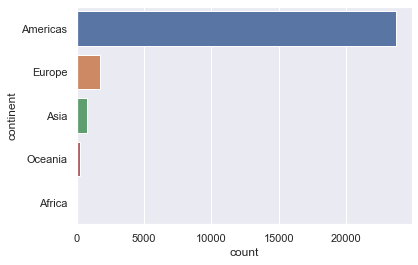

In [13]:
sns.countplot(y="continent",
              data=df,
              order=df["continent"].value_counts().index);

In [14]:
df["continent"].value_counts()

Americas    23655
Europe       1738
Asia          743
Oceania       225
Africa         49
Name: continent, dtype: int64

As you can see, people from all continents compete in this marathon. But overall, the majority of them are Americans

#### Country

Total countries: 91


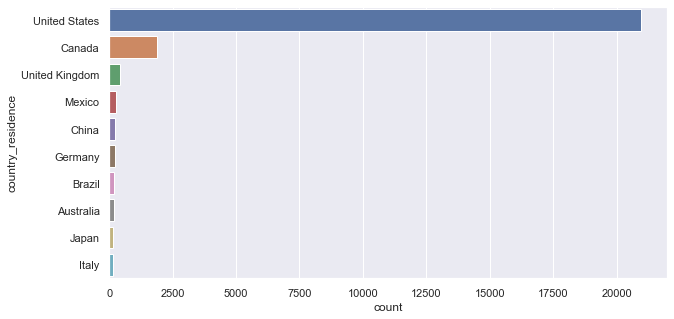

In [15]:
print(f"Total countries: {len(df['country_residence'].unique())}")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(y="country_residence",
              data=df,
              ax=ax,
              order=df["country_residence"].value_counts().index[:10]);

Because the marathon was organized in Boston - America, so it is easy to understand that America has the highest participants. Several participants are also from other places like Asia, Eroupe, Africa.

#### City

Total cities:  5926


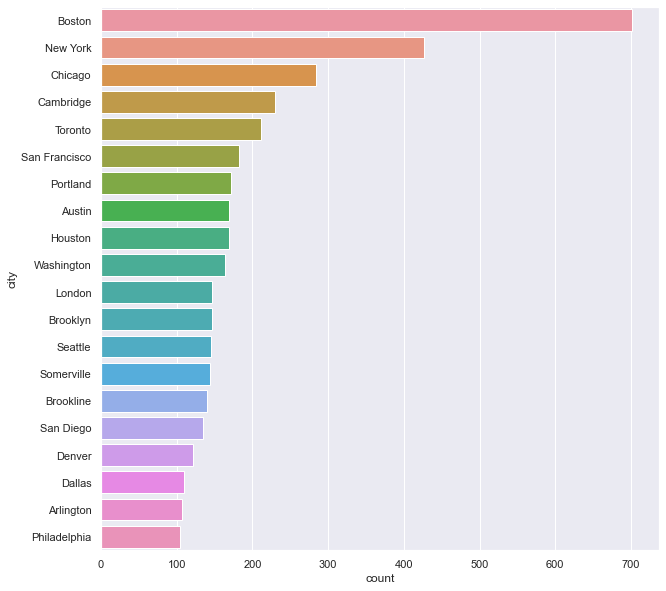

In [16]:
print("Total cities: ", len(df["city"].unique()))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.countplot(y="city",
              data=df,
              ax=ax,
              order=df["city"].value_counts().index[:20]);

Not only Boston, citizens from many areas of America attended this competition. The chart above shows 20 cities which had most citizens attended

#### Gender

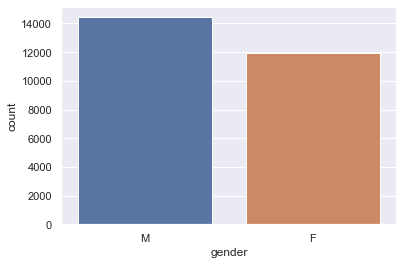

In [17]:
sns.countplot(x="gender",
              data=df,
              order=df["gender"].value_counts().index);

In [18]:
print("Percentage of the Male in dataset: %0.2f%%" % (df["gender"].value_counts()["M"] / len(df) * 100))

Percentage of the Male in dataset: 54.67%


The different percentage between two categories is not really high

#### Age

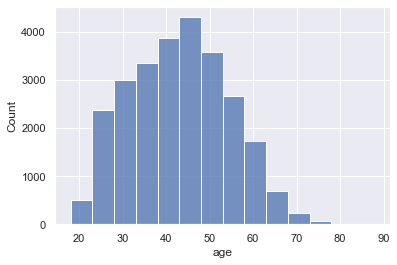

In [19]:
sns.histplot(data=df, x="age", binwidth=5);

Most of the participants have age ranging from 23 - 62. This feature data seems to have the bell shape.

#### Result second

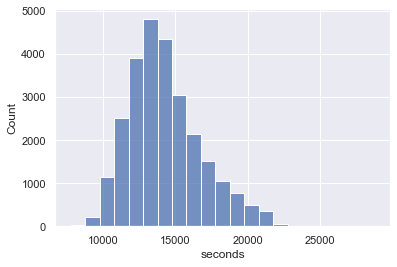

In [20]:
sns.histplot(data=df, x="seconds", binwidth=1000);

The participants' finish time are ranging from 10000 - 17500. This feature data seems to have the bell shape.

5926 is the number of cities that participants come from

#### Time

In [21]:
# projected_time is also null
df["projected_time"].unique()

array(['-'], dtype=object)

- 5k: Time for 5 kilometers
- 10k: Time for 10 kilometers
- 15k: Time for 15 kilometers
- 20k: Time for 20 kilometers
- half: Time for half of the way
- 25k: Time for 25 kilometers
- 30k: Time for 30 kilometers
- 35k: Time for 35 kilometers
- 40k: Time for 40 kilometers
- pace: Time for each miles kilometers
- official_time | seconds: Overall time

#### Place

In [22]:
print(f"Total places: {len(df['overall'])}")

Total places: 26410


#### Gender Place

In [23]:
min_female_rank = int(df.groupby(["gender"])["gender_result"].min()["F"])
max_female_rank = int(df.groupby(["gender"])["gender_result"].max()["F"])

min_male_rank = int(df.groupby(["gender"])["gender_result"].min()["M"])
max_male_rank = int(df.groupby(["gender"])["gender_result"].max()["M"])

print(f"Rank of female is from {min_female_rank} to {max_female_rank}")
print(f"Rank of male is from {min_male_rank} to {max_male_rank}")

Rank of female is from 1 to 11973
Rank of male is from 1 to 14438


#### Division place

In [24]:
print(f"Total divisions: {len(df[df['division_result'] == 1])}")

Total divisions: 20


There are several impairments happening for participants, so the Boston marathon has 20 divisions (based on the data) for all participants (no information about 20 divisions on the Internet, just found Wheelchair, Sightless, ...)

### Multivariate analysis

#### Heat map

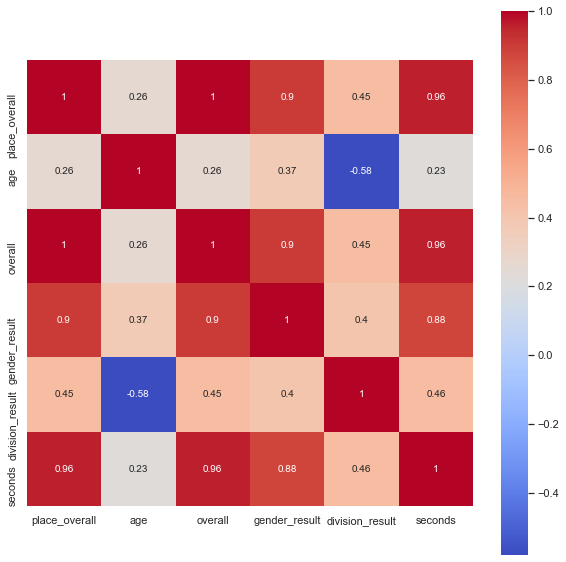

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True, cmap="coolwarm", ax=ax);

Via the correlation heatmap, I will drop `place_overall` and `overall` features

#### Continent - Average seconds by continent

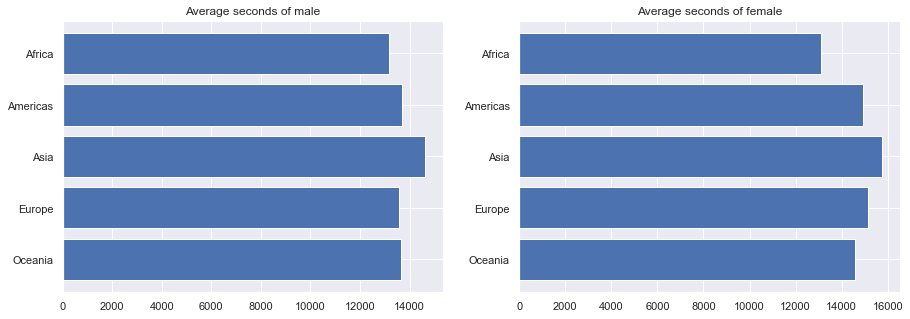

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

data = df[df["gender"] == "M"].groupby("continent")["seconds"].mean().sort_index(ascending=False)
ax[0].barh(data.index, data.values)
ax[0].set_title("Average seconds of male")

data = df[df["gender"] == "F"].groupby("continent")["seconds"].mean().sort_index(ascending=False)
ax[1].barh(data.index, data.values)
ax[1].set_title("Average seconds of female")

plt.show()

The trending seconds of all continents of two genders are quite similar.

I guess the robustness of Asian is lower compared to other continents. So it takes longer to them to finish the marathon

#### Correlation between age and time to finish

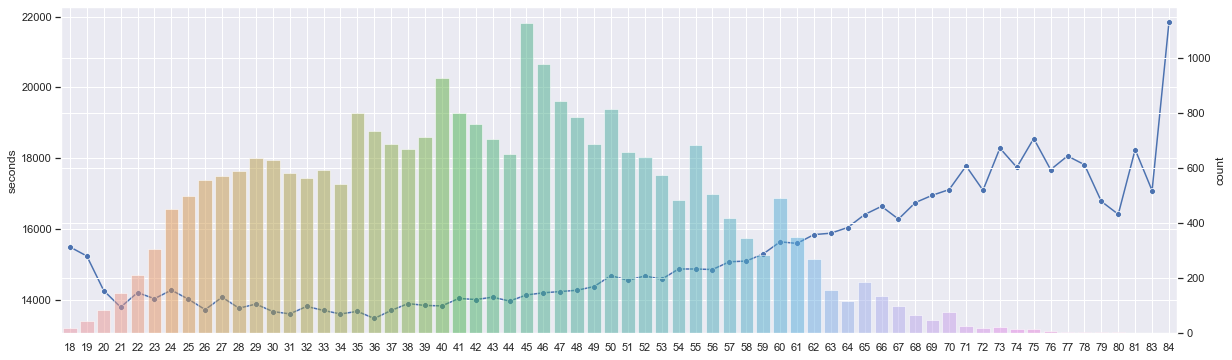

In [27]:
data = df[["age", "seconds"]].groupby("age")["seconds"].mean().reset_index()
data["count"] = data["age"].apply(lambda x: len(df[df["age"] == x]))
data = data.astype(int)

fig, ax1 = plt.subplots(figsize=(20, 6))

sns.lineplot(data=data["seconds"], marker="o", ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data=data, x="age", y="count", alpha=0.5, ax=ax2);

We can clearly see that effect of age towards seconds. The older the participants are, the longer they finish the marathon.

But that perspective only apply for people who are over 40, where age really affects health and longevity. For younger people, especially who have age range between 34-37, they achieve highest result. I think they have better strategy and are well-prepared when doing marathon than the younger age.

### Features removal and engineering

In [28]:
df = df.drop([
    "name",
    "place_overall",
    "overall",
    "projected_time",
    "first_name",
    "last_name",
    "display_name",
    
    # duplicated seconds
    "official_time",
    
    # features have many unique values
    "city",
    "country_residence",
], axis=1)

In [29]:
def convert_to_second_decorator(distance_type):
    km = {
        "5k": 5,
        "10k": 10,
        "15k": 15,
        "20k": 20,
        "half": 21,
        "25k": 25,
        "30k": 30,
        "35k": 35,
        "40k": 5,
        "pace": 1
    }
    distance_type = km[distance_type]
    
    def convert_to_second(time_string, pace_time):
        if type(time_string) == int:
            return time_string

        if time_string == "-":
            return distance_type * pace_time
    
        time_test = time.strptime(time_string, "%H:%M:%S")
    
        return time_test.tm_hour * 3600 + time_test.tm_min * 60 + time_test.tm_sec
    
    return convert_to_second

converted_to_seconds_columns = ["pace", "5k", "10k", "15k", "20k", "half", "25k", "30k", "35k", "40k"]

for column in converted_to_seconds_columns:
    convert_to_second = convert_to_second_decorator(column)
    df[column] = df.apply(lambda row: convert_to_second(row[column], row["pace"]), axis=1)

In [30]:
df.head(5)

,age,gender,5k,10k,15k,20k,half,25k,30k,35k,40k,pace,gender_result,division_result,seconds,continent
0,24.0,M,925,1828,2744,3675,3875,4619,5581,6499,7373,297,1.0,1.0,7777,Africa
1,30.0,M,924,1827,2744,3675,3875,4619,5581,6499,7394,298,2.0,2.0,7798,Americas
2,25.0,M,925,1829,2744,3676,3876,4620,5581,6511,7418,299,3.0,3.0,7828,Asia
3,32.0,M,925,1829,2744,3679,3885,4620,5581,6538,7475,303,4.0,4.0,7928,Americas
4,31.0,M,925,1828,2744,3675,3875,4619,5581,6521,7500,304,5.0,5.0,7955,Africa


In [32]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [33]:
dummy_columns = ["gender", "continent"]

for column in dummy_columns:
    df = df.join(pd.get_dummies(df[column], column, drop_first=True, dtype=bool))
    
df = df.drop(dummy_columns, axis=1)

In [34]:
for feature in ["5k", "10k", "15k", "20k", "half", "25k", "30k", "35k", "40k", "pace", "seconds"]:
    z_scores = np.abs(stats.zscore(df[feature]))
    df = df[z_scores <= 3]

In [35]:
normalized_columns = ["age"]
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df[normalized_columns])
df[normalized_columns] = min_max_scaler.transform(df[normalized_columns])

standardized_columns = ["5k", "10k", "15k", "20k", "half", "25k", "30k", "35k", "40k", "pace", "seconds"]
standard_scaler = StandardScaler()
df[standardized_columns] = standard_scaler.fit_transform(df[standardized_columns])

# normalize
# train test split 

In [ ]:
df = df.reset_index()

In [36]:
df.head(5)

,age,5k,10k,15k,20k,half,25k,30k,35k,40k,pace,gender_result,division_result,seconds,gender_M,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,0.092308,-2.657020,-2.716022,-2.712135,-2.665613,-2.665411,-2.607117,-2.582496,-2.614953,-2.679562,-2.702768,1.0,1.0,-2.701538,True,False,False,False,False
1,0.184615,-2.661472,-2.718247,-2.712135,-2.665613,-2.665411,-2.607117,-2.582496,-2.614953,-2.670152,-2.691648,2.0,2.0,-2.692631,True,True,False,False,False
2,0.107692,-2.657020,-2.713797,-2.712135,-2.664565,-2.664422,-2.606321,-2.582496,-2.608688,-2.659399,-2.680527,3.0,3.0,-2.679907,True,False,True,False,False
3,0.215385,-2.657020,-2.713797,-2.712135,-2.661424,-2.655515,-2.606321,-2.582496,-2.594593,-2.633860,-2.636045,4.0,4.0,-2.637492,True,True,False,False,False
4,0.200000,-2.657020,-2.716022,-2.712135,-2.665613,-2.665411,-2.607117,-2.582496,-2.603467,-2.622658,-2.624925,5.0,5.0,-2.626040,True,False,False,False,False


### Find cluster number and train model

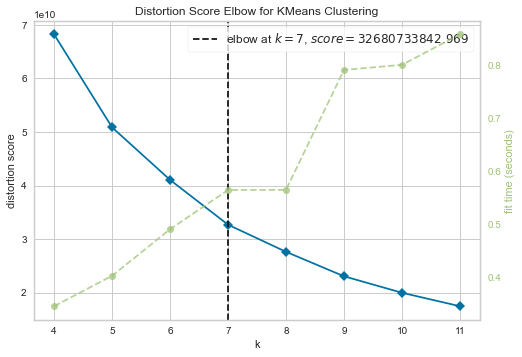

In [37]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

In [38]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df)

KMeans(n_clusters=7)

### Visualize clusters

In [83]:
# convert back data
def get_continent(row):
    if row["continent_Americas"]:
        return "America"
    
    if row["continent_Asia"]:
        return "Asia"
    
    if row["continent_Europe"]:
        return "Europe"
    
    if row["continent_Oceania"]:
        return "Oceania"
    
    return "Africa"

df["gender"] = df["gender_M"].apply(lambda x: "M" if x else "F")
df["continent"] = df.apply(lambda row: get_continent(row), axis=1)

df = df.drop(["gender_M",
              "continent_Americas",
              "continent_Asia",
              "continent_Europe",
              "continent_Oceania"], axis=1)

In [160]:
df[normalized_columns] = min_max_scaler.inverse_transform(df[normalized_columns])
df[standardized_columns] = standard_scaler.inverse_transform(df[standardized_columns])

In [161]:
result = kmeans.labels_
print("Result: ", result)

Result:  [6 6 6 ... 2 2 2]


In [162]:
result = np.array(result)

df_with_indices = {}

for i in range(7):
    indices = list(np.where(result == i)[0])
    df_with_indices[i] = df.loc[indices]

In [163]:
df.columns

Index(['index', 'age', '5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k',
       '40k', 'pace', 'gender_result', 'division_result', 'seconds', 'gender',
       'continent'],
      dtype='object')

#### Gender

In [164]:
cluster_names = [f"Cluster {x}" for x in range(1, 8)]
cluster_indices = [x for x in range(1, 8)]

In [165]:
male_per_cluster = []
female_per_cluster = []

for i in range(7):
    genders = df_with_indices[i]["gender"].value_counts()
    male_per_cluster.append(genders["M"])
    female_per_cluster.append(genders["F"])

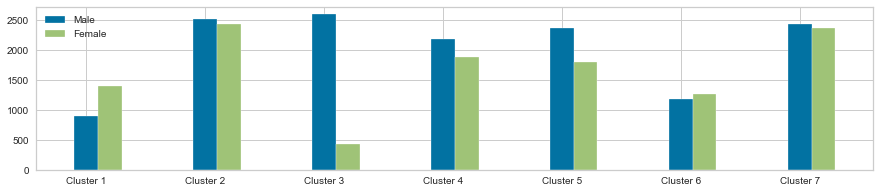

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))

bar1 = ax.bar(cluster_indices, male_per_cluster, width=0.2)
bar2 = ax.bar([index + 0.2 for index in cluster_indices], female_per_cluster, width=0.2)
ax.set_xticks(range(1, 8))
ax.set_xticklabels(cluster_names)

ax.legend((bar1[0], bar2[0]), ("Male", "Female"))

plt.show()

#### Continent

In [167]:
continents = df["continent"].unique()
continents.sort()

In [168]:
continents_count = []

for continent in continents:
    count = []
    
    for i in range(7):
        values = df_with_indices[i]["continent"].value_counts()
        count.append(values.get(continent, 0))

    continents_count.append(count)

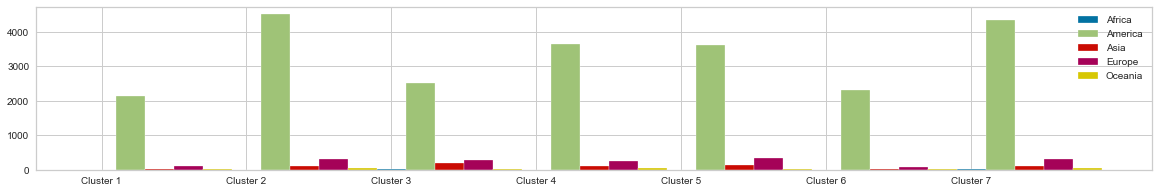

In [169]:
fig, ax = plt.subplots(1, 1, figsize=(20, 3))
legends = []

for i in range(len(continents)):
    bar = ax.bar([index + 0.2 * i for index in cluster_indices], continents_count[i], width=0.2)
    legends.append(bar[0])
    
ax.set_xticks(range(1, len(cluster_names) + 1))
ax.set_xticklabels(cluster_names)
ax.legend(legends, continents)
plt.show()

#### Age

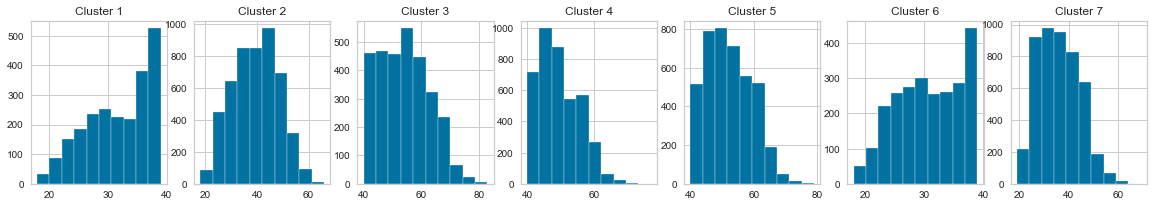

In [173]:
fig, ax = plt.subplots(1, 7, figsize=(20, 3))

for i in range(7):
    ax[i].hist(df_with_indices[i]["age"])
    ax[i].set_title(f"Cluster {i + 1}")

plt.show()

#### Plot 5k, 10k, 15k, 20k, half, 25k, 30k, 35k, 40k, seconds

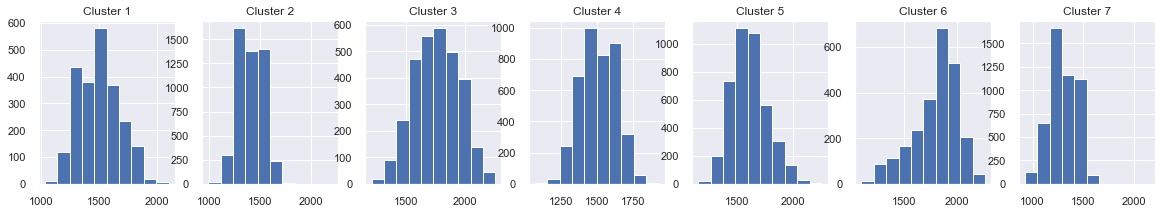

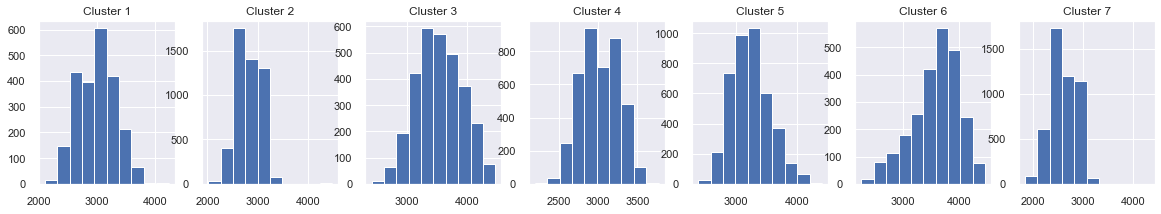

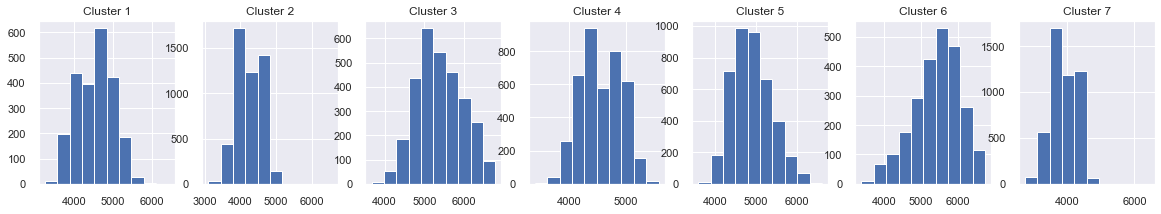

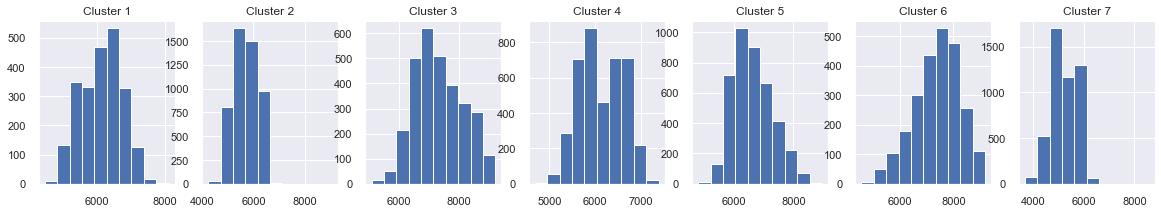

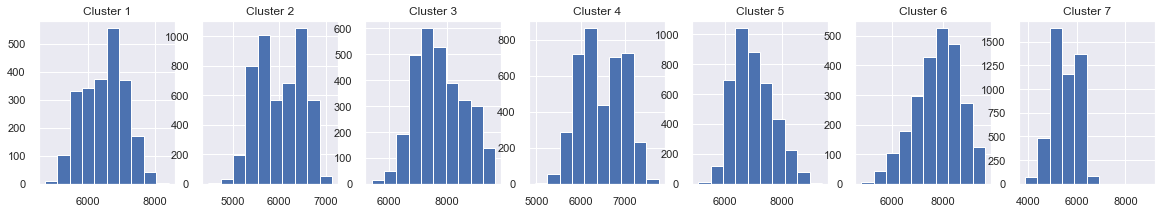

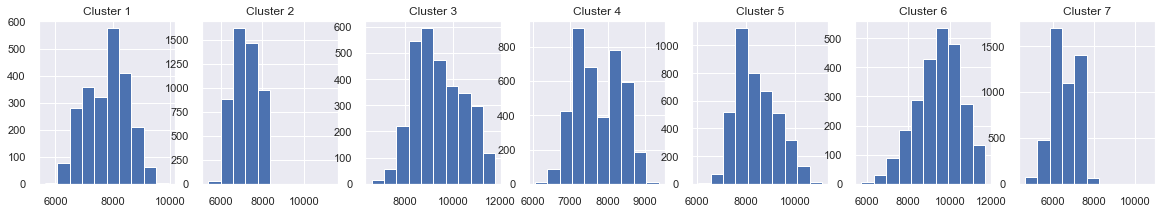

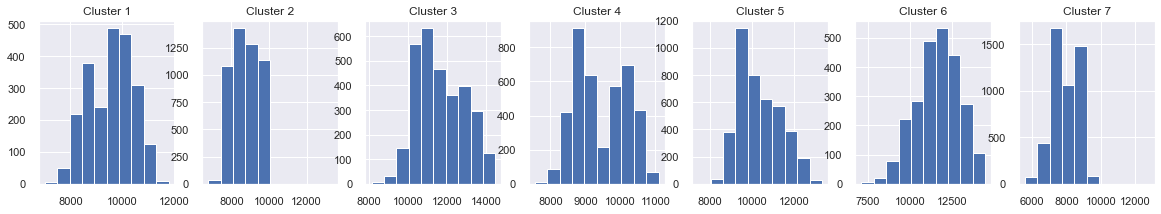

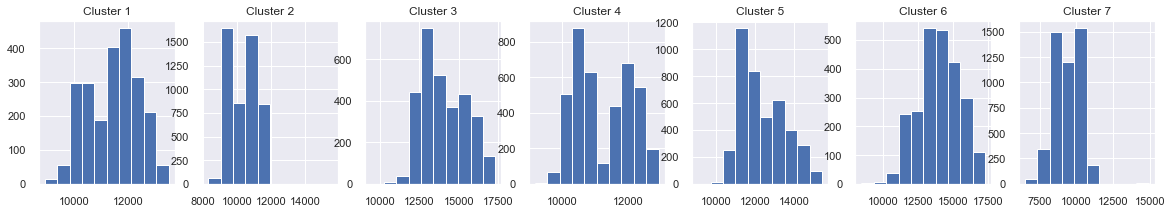

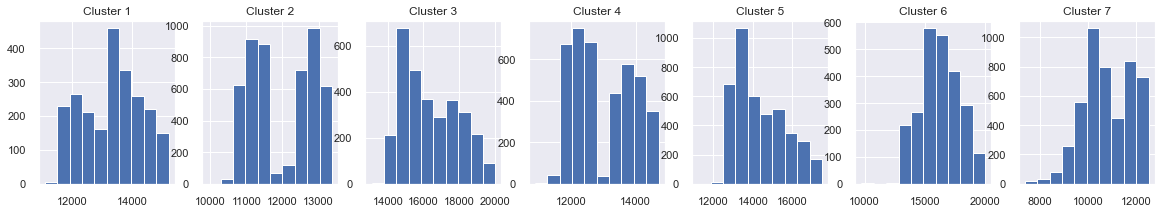

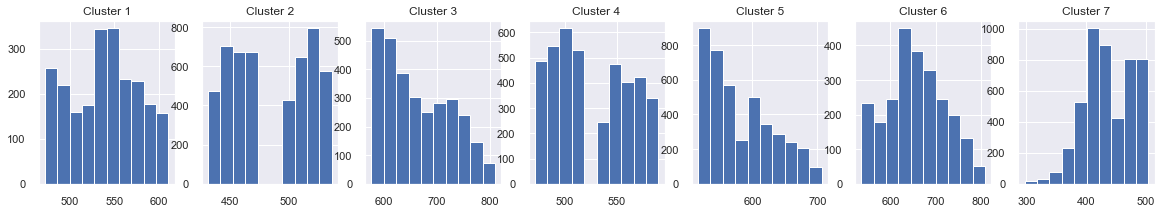

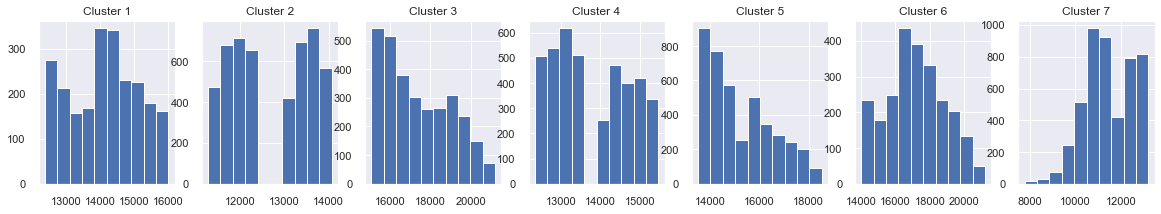

In [182]:
for column in ["5k", "10k", "15k", "20k", "half", "25k", "30k", "35k", "40k", "pace", "seconds"]:
    fig, ax = plt.subplots(1, 7, figsize=(20, 3))
    display(HTML(f"<h4 style='text-align: center'>{column}</h4>"))

    for i in range(7):
        ax[i].hist(df_with_indices[i][column])
        ax[i].set_title(f"Cluster {i + 1}")

    plt.show()
    
    display(HTML(""))
    display(HTML(""))

In [ ]:
# 'age', '5k', '10k', '15k', '20k', 'half', '25k', '30k', '35k', '40k', 'pace', 'gender_result', 'division_result', 'seconds'